# E-commerce Sales and Customer Behavior Analysis

## Scenario Description

Imagine you are working for an e-commerce company that sells a variety of products online.
<br>
The company aims to understand its sales performance and customer behavior to make data-driven decisions for enhancing sales and marketing strategies.

### Data

I have generated a random transaction dataset that we can explore to address key business questions. This dataset includes various aspects of sales transactions, customer information, product details, and marketing campaign data.

### Project Plan

In this project, we will:

1. **Explore the Data:**
   - Dive into the dataset to understand its structure and contents.
   - Identify any data cleaning or preprocessing needs.

2. **Find Trends and Insights:**
   - Analyze sales performance to detect trends and seasonality.
   - Examine customer behavior to gain insights into demographics and acquisition patterns.
   - Review product inventory to manage stock levels effectively.
   - Evaluate marketing campaign effectiveness to optimize future strategies.

3. **Visualize the Data:**
   - Create visualizations to represent sales trends, customer demographics, and inventory status.
   - Build dashboards to provide a comprehensive view of the data and support decision-making.

## Questions to Answer

### 1. Sales Performance Analysis
- **What are the total sales and revenue trends over time?**
  - Visualize sales and revenue over different periods (daily, weekly, monthly) to identify trends and seasonality.

- **Which product categories are generating the most revenue?**
  - Compare total sales by product category to determine which categories are most profitable.

- **What are the top-selling products?**
  - Identify products with the highest quantity sold or total sales amount.

### 2. Customer Behavior Insights
- **What is the distribution of customers by age and gender?**
  - Create visualizations to understand the demographics of your customer base.

- **Where are your customers located?**
  - Map customer locations to identify geographic patterns and potential areas for market expansion.

- **How does customer acquisition vary over time?**
  - Analyze the number of new customers acquired each month or quarter.

### 3. Product and Inventory Management
- **What is the current inventory status of each product?**
  - Monitor stock levels to avoid stockouts or overstocking.

### 4. Marketing Campaign Effectiveness
- **Which marketing campaigns have been the most successful?**
  - Evaluate campaigns based on metrics like CTR, conversion rate, and ROI.

- **How does campaign performance vary by time of year?**
  - Analyze if certain times of the year yield better results for specific types of campaigns.


In [824]:
# Lets start with my favorite pandas boilerplate

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import folium  # Might use
import geopandas as gpd  # Might use

# On local machines I always start with this
# pwd = os.getcwd()

# for kaggle we could tweak it a bit to get the same benefit
pwd = "/kaggle/input/business-transaction-data"


# Read in our Data
df = pd.read_csv(pwd + "/business_scenario.csv")

In [825]:
# Quick check to verify our data loaded
df

,Transaction ID,Date of Purchase,Product Category,Product ID,Quantity Sold,Unit Price,Total Sale Amount,Customer ID,Customer Age,Gender,...,Supplier,Campaign ID,Campaign Name,Start Date,End Date,Budget,Channels Used,Number of Impressions,Click-through Rate (CTR),Conversion Rate
0,6dd4d2dd-09ba-414b-963c-1a52824b0cb6,2023-11-19,Books,ZV5BJV,14,458.92,6424.88,72f44739-9c1c-48ab-b058-c559a95d22a7,29,Female,...,Supplier Z,edca163d-6acd-4503-9e06-489afab5e188,Innovative bandwidth-monitored conglomeration,2023-12-06,2024-01-05,21671.57,"['Radio', 'Social Media', 'TV', 'Email', 'Prin...",43143,0.0654,0.1743
1,f0783f57-b52f-427b-bb0f-f9825aa447ad,2024-01-16,Home & Kitchen,N61TQY,20,279.39,5587.80,f4375928-1978-47b2-abc9-db3c3828e401,38,Male,...,Supplier Z,b43831fe-e628-478d-ad45-46a126eca9ec,Fundamental intermediate artificial intelligence,2023-12-22,2023-12-31,90363.05,['Print Media'],736967,0.0217,0.0369
2,55bbd613-5391-4c0a-b6c7-0dd0ed52414b,2024-05-11,Toys & Games,9S9JV9,10,67.13,671.30,64cf67af-9978-4fa4-b140-22c457fec974,27,Male,...,Supplier X,f0366543-d541-4ebd-b396-4dcf377b17ea,Advanced content-based implementation,2024-03-10,2024-07-01,17078.48,['Email'],60278,0.0657,0.0260
3,0155cceb-9471-439b-adbe-ccf3cc86f4e0,2024-04-16,Toys & Games,KQFT3A,2,472.94,945.88,ebe56b7a-af0e-4105-a31d-401f697100c3,25,Male,...,Supplier Y,add16a43-449e-4c16-90ac-6b04ef28d1ce,Synergistic empowering monitoring,2024-02-25,2024-07-03,51180.36,"['Email', 'TV', 'Social Media', 'Print Media']",949514,0.0519,0.1825
4,1c448acc-a3d2-4fe8-be54-4ad3c219f5d6,2024-03-09,Electronics,1K4J7B,12,171.49,2057.88,810480f0-44ad-4e71-8a44-37c24cc00e09,50,Female,...,Supplier Y,1941af03-4d73-4e11-9a2f-48924fa14c73,Configurable bi-directional benchmark,2024-05-08,2024-05-13,96049.41,"['Email', 'Print Media', 'Social Media', 'Radio']",655362,0.0658,0.1964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,e0c7734c-482a-4866-8012-64b70d9c10ec,2024-05-25,Home & Kitchen,0V9Z7B,3,109.86,329.58,57ba0112-945b-470f-a46e-a6d6faf65cdf,58,Male,...,Supplier Z,1f67b3dc-a9ee-4190-8dc0-93a3773f4fa0,Automated asymmetric superstructure,2024-08-13,2024-08-24,50397.47,"['Print Media', 'TV', 'Radio', 'Email']",573552,0.0663,0.1720
9996,21f35446-03d9-4578-baf7-622cc16a0f20,2024-02-17,Home & Kitchen,ND3ZRI,17,261.77,4450.09,ba8f3b9f-3b38-482f-b00d-25a9c894207e,29,Female,...,Supplier Y,d7ef298a-0565-42a6-9c44-fd6350a5a82a,Integrated solution-oriented paradigm,2024-04-05,2024-07-01,21967.58,['Social Media'],181132,0.0923,0.2566
9997,19385742-5b0b-4397-b3c2-7ae0f8d0652f,2023-10-24,Clothing,XJETLB,15,299.80,4497.00,c437a77f-9f3a-475f-8ce3-191656096431,41,Female,...,Supplier Z,3161605b-3d63-42db-93da-dac7ac60efb4,Programmable stable help-desk,2024-03-02,2024-05-11,39755.37,"['TV', 'Radio', 'Print Media', 'Social Media']",693172,0.0357,0.2121
9998,11d34c5a-0ad1-4b73-be28-5a1b0a059f74,2023-10-29,Clothing,SPFPH3,17,433.27,7365.59,698b47c5-713b-40a5-9b7b-50f4b4cdc27a,68,Female,...,Supplier X,2eee84f3-c098-4a7e-bebf-42d1a269f069,Business-focused mission-critical approach,2024-05-02,2024-05-05,13898.56,['Email'],774625,0.0693,0.0715


In [826]:
# I use list() so I get a cleaner look at the columns
list(df.columns)

['Transaction ID',
 'Date of Purchase',
 'Product Category',
 'Product ID',
 'Quantity Sold',
 'Unit Price',
 'Total Sale Amount',
 'Customer ID',
 'Customer Age',
 'Gender',
 'Location (City/State/Country)',
 'Signup Date',
 'Product Name',
 'Stock Quantity',
 'Supplier',
 'Campaign ID',
 'Campaign Name',
 'Start Date',
 'End Date',
 'Budget',
 'Channels Used',
 'Number of Impressions',
 'Click-through Rate (CTR)',
 'Conversion Rate']

In [827]:
# just taking an overall look at the data
df.head

<bound method NDFrame.head of                             Transaction ID Date of Purchase Product Category  \
0     6dd4d2dd-09ba-414b-963c-1a52824b0cb6       2023-11-19            Books   
1     f0783f57-b52f-427b-bb0f-f9825aa447ad       2024-01-16   Home & Kitchen   
2     55bbd613-5391-4c0a-b6c7-0dd0ed52414b       2024-05-11     Toys & Games   
3     0155cceb-9471-439b-adbe-ccf3cc86f4e0       2024-04-16     Toys & Games   
4     1c448acc-a3d2-4fe8-be54-4ad3c219f5d6       2024-03-09      Electronics   
...                                    ...              ...              ...   
9995  e0c7734c-482a-4866-8012-64b70d9c10ec       2024-05-25   Home & Kitchen   
9996  21f35446-03d9-4578-baf7-622cc16a0f20       2024-02-17   Home & Kitchen   
9997  19385742-5b0b-4397-b3c2-7ae0f8d0652f       2023-10-24         Clothing   
9998  11d34c5a-0ad1-4b73-be28-5a1b0a059f74       2023-10-29         Clothing   
9999  b5b10b42-65d3-4a51-a9db-2afb0456402c       2023-12-16     Toys & Games   

     Prod

In [828]:
# just taking an overall look at the data types
df.dtypes

Transaction ID                    object
Date of Purchase                  object
Product Category                  object
Product ID                        object
Quantity Sold                      int64
Unit Price                       float64
Total Sale Amount                float64
Customer ID                       object
Customer Age                       int64
Gender                            object
Location (City/State/Country)     object
Signup Date                       object
Product Name                      object
Stock Quantity                     int64
Supplier                          object
Campaign ID                       object
Campaign Name                     object
Start Date                        object
End Date                          object
Budget                           float64
Channels Used                     object
Number of Impressions              int64
Click-through Rate (CTR)         float64
Conversion Rate                  float64
dtype: object

In [829]:
# quick way to count all duplicates in the dataframe

df.duplicated().value_counts()


False    10000
Name: count, dtype: int64

### If we had duplicates we would have to filter down to find them and see IF we should drop them.
#### _Do not just drop duplicates without first investigating why they are there and if they should be there_

## Possible ways to answer our Questions

### 1. Sales Performance Analysis
- **What are the total sales and revenue trends over time?**
  - Visualize sales and revenue over different periods (daily, weekly, monthly) to identify trends and seasonality.
      - **Answer** - Definetly want 'Total Sale Amount', and then dates from 'Date of Purchase', and maybe 'Quantity Sold' to track units instead of amount.

- **Which product categories are generating the most revenue?**
  - Compare total sales by product category to determine which categories are most profitable.
      - **Answer** - We need 'Product Category', and 'Total Sale Amount'  We probably dont need dates since we just want overall most revenue.

- **What are the top-selling products?**
  - Identify products with the highest quantity sold or total sales amount.
       - **Answer** - Similar to above we are just wanting top products, so we need 'Total Sale Amount' and 'Product Name' since that is most relevant.

### 2. Customer Behavior Insights
- **What is the distribution of customers by age and gender?**
  - Create visualizations to understand the demographics of your customer base.
       - **Answer** - We need customer demographics data, so lets grab 'Customer Age', 'Gender',and 'Location' just so we have the data incase we want to map.

- **Where are your customers located?**
  - Map customer locations to identify geographic patterns and potential areas for market expansion.
      - **Answer** - we need 'Customer ID', and 'Location'

- **How does customer acquisition vary over time?**
  - Analyze the number of new customers acquired each month or quarter.
     - **Answer** - We will need to find the first 'Transaction ID' grouped by 'Customer ID' so we can see new customers and graph acuisition.
     - **Answer: CONT** We can save this as a separate df so we can group with campaign data later.

### 3. Product and Inventory Management
- **What is the current inventory status of each product?**
  - Monitor stock levels to avoid stockouts or overstocking.
       - **Answer** - We only need 'Product Name' and 'Stock Quantity' We can store this separately for the sole purpose of inventory tracking.
       - **Answer CONT** Either us as analysts or a data engineer may want to streamline this data pipeline for actual inventory tracking.
       - **Answer CONT** This should almost always already be part of a companies data structure though since its one of the first things you would set up.

### 4. Marketing Campaign Effectiveness
- **Which marketing campaigns have been the most successful?**
  - Evaluate campaigns based on metrics like CTR, conversion rate, and ROI.
       - **Answer** - We will need to group 'Campaign Name' by time durations between 'Start Date' and 'End Date'. 
       - **Answer CONT** We can then look at the 'Total Sale Amount' during and after each of those times. Then look at the top 'Campaign Name' in that data.

- **How does campaign performance vary by time of year?**
  - Analyze if certain times of the year yield better results for specific types of campaigns.
       - **Answer** - Our data above can be used for this question. Except we will want to segment out the dates by time of year. We can easily do quarters.
       - **Answer CONT** Or if we wanted to get really technical we could look at dates around all the major retail holidays when people are known to spend more.

In [830]:
# What are the total sales and revenue trends over time?

## Visualize sales and revenue over different periods (daily, weekly, monthly) to identify trends and seasonality.
### Answer - Definetly want 'Total Sale Amount', and then dates from 'Date of Purchase', and maybe 'Quantity Sold' to track units instead of amount.

df

,Transaction ID,Date of Purchase,Product Category,Product ID,Quantity Sold,Unit Price,Total Sale Amount,Customer ID,Customer Age,Gender,...,Supplier,Campaign ID,Campaign Name,Start Date,End Date,Budget,Channels Used,Number of Impressions,Click-through Rate (CTR),Conversion Rate
0,6dd4d2dd-09ba-414b-963c-1a52824b0cb6,2023-11-19,Books,ZV5BJV,14,458.92,6424.88,72f44739-9c1c-48ab-b058-c559a95d22a7,29,Female,...,Supplier Z,edca163d-6acd-4503-9e06-489afab5e188,Innovative bandwidth-monitored conglomeration,2023-12-06,2024-01-05,21671.57,"['Radio', 'Social Media', 'TV', 'Email', 'Prin...",43143,0.0654,0.1743
1,f0783f57-b52f-427b-bb0f-f9825aa447ad,2024-01-16,Home & Kitchen,N61TQY,20,279.39,5587.80,f4375928-1978-47b2-abc9-db3c3828e401,38,Male,...,Supplier Z,b43831fe-e628-478d-ad45-46a126eca9ec,Fundamental intermediate artificial intelligence,2023-12-22,2023-12-31,90363.05,['Print Media'],736967,0.0217,0.0369
2,55bbd613-5391-4c0a-b6c7-0dd0ed52414b,2024-05-11,Toys & Games,9S9JV9,10,67.13,671.30,64cf67af-9978-4fa4-b140-22c457fec974,27,Male,...,Supplier X,f0366543-d541-4ebd-b396-4dcf377b17ea,Advanced content-based implementation,2024-03-10,2024-07-01,17078.48,['Email'],60278,0.0657,0.0260
3,0155cceb-9471-439b-adbe-ccf3cc86f4e0,2024-04-16,Toys & Games,KQFT3A,2,472.94,945.88,ebe56b7a-af0e-4105-a31d-401f697100c3,25,Male,...,Supplier Y,add16a43-449e-4c16-90ac-6b04ef28d1ce,Synergistic empowering monitoring,2024-02-25,2024-07-03,51180.36,"['Email', 'TV', 'Social Media', 'Print Media']",949514,0.0519,0.1825
4,1c448acc-a3d2-4fe8-be54-4ad3c219f5d6,2024-03-09,Electronics,1K4J7B,12,171.49,2057.88,810480f0-44ad-4e71-8a44-37c24cc00e09,50,Female,...,Supplier Y,1941af03-4d73-4e11-9a2f-48924fa14c73,Configurable bi-directional benchmark,2024-05-08,2024-05-13,96049.41,"['Email', 'Print Media', 'Social Media', 'Radio']",655362,0.0658,0.1964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,e0c7734c-482a-4866-8012-64b70d9c10ec,2024-05-25,Home & Kitchen,0V9Z7B,3,109.86,329.58,57ba0112-945b-470f-a46e-a6d6faf65cdf,58,Male,...,Supplier Z,1f67b3dc-a9ee-4190-8dc0-93a3773f4fa0,Automated asymmetric superstructure,2024-08-13,2024-08-24,50397.47,"['Print Media', 'TV', 'Radio', 'Email']",573552,0.0663,0.1720
9996,21f35446-03d9-4578-baf7-622cc16a0f20,2024-02-17,Home & Kitchen,ND3ZRI,17,261.77,4450.09,ba8f3b9f-3b38-482f-b00d-25a9c894207e,29,Female,...,Supplier Y,d7ef298a-0565-42a6-9c44-fd6350a5a82a,Integrated solution-oriented paradigm,2024-04-05,2024-07-01,21967.58,['Social Media'],181132,0.0923,0.2566
9997,19385742-5b0b-4397-b3c2-7ae0f8d0652f,2023-10-24,Clothing,XJETLB,15,299.80,4497.00,c437a77f-9f3a-475f-8ce3-191656096431,41,Female,...,Supplier Z,3161605b-3d63-42db-93da-dac7ac60efb4,Programmable stable help-desk,2024-03-02,2024-05-11,39755.37,"['TV', 'Radio', 'Print Media', 'Social Media']",693172,0.0357,0.2121
9998,11d34c5a-0ad1-4b73-be28-5a1b0a059f74,2023-10-29,Clothing,SPFPH3,17,433.27,7365.59,698b47c5-713b-40a5-9b7b-50f4b4cdc27a,68,Female,...,Supplier X,2eee84f3-c098-4a7e-bebf-42d1a269f069,Business-focused mission-critical approach,2024-05-02,2024-05-05,13898.56,['Email'],774625,0.0693,0.0715


In [831]:
df["Date of Purchase"] = pd.to_datetime(df["Date of Purchase"])

In [832]:
df['Month'] = df['Date of Purchase'].dt.month
df['Year'] = df['Date of Purchase'].dt.year
df['Month of Purchase'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)
df = df.drop(columns=['Year', 'Month'])
df

,Transaction ID,Date of Purchase,Product Category,Product ID,Quantity Sold,Unit Price,Total Sale Amount,Customer ID,Customer Age,Gender,...,Campaign ID,Campaign Name,Start Date,End Date,Budget,Channels Used,Number of Impressions,Click-through Rate (CTR),Conversion Rate,Month of Purchase
0,6dd4d2dd-09ba-414b-963c-1a52824b0cb6,2023-11-19,Books,ZV5BJV,14,458.92,6424.88,72f44739-9c1c-48ab-b058-c559a95d22a7,29,Female,...,edca163d-6acd-4503-9e06-489afab5e188,Innovative bandwidth-monitored conglomeration,2023-12-06,2024-01-05,21671.57,"['Radio', 'Social Media', 'TV', 'Email', 'Prin...",43143,0.0654,0.1743,2023-11
1,f0783f57-b52f-427b-bb0f-f9825aa447ad,2024-01-16,Home & Kitchen,N61TQY,20,279.39,5587.80,f4375928-1978-47b2-abc9-db3c3828e401,38,Male,...,b43831fe-e628-478d-ad45-46a126eca9ec,Fundamental intermediate artificial intelligence,2023-12-22,2023-12-31,90363.05,['Print Media'],736967,0.0217,0.0369,2024-01
2,55bbd613-5391-4c0a-b6c7-0dd0ed52414b,2024-05-11,Toys & Games,9S9JV9,10,67.13,671.30,64cf67af-9978-4fa4-b140-22c457fec974,27,Male,...,f0366543-d541-4ebd-b396-4dcf377b17ea,Advanced content-based implementation,2024-03-10,2024-07-01,17078.48,['Email'],60278,0.0657,0.0260,2024-05
3,0155cceb-9471-439b-adbe-ccf3cc86f4e0,2024-04-16,Toys & Games,KQFT3A,2,472.94,945.88,ebe56b7a-af0e-4105-a31d-401f697100c3,25,Male,...,add16a43-449e-4c16-90ac-6b04ef28d1ce,Synergistic empowering monitoring,2024-02-25,2024-07-03,51180.36,"['Email', 'TV', 'Social Media', 'Print Media']",949514,0.0519,0.1825,2024-04
4,1c448acc-a3d2-4fe8-be54-4ad3c219f5d6,2024-03-09,Electronics,1K4J7B,12,171.49,2057.88,810480f0-44ad-4e71-8a44-37c24cc00e09,50,Female,...,1941af03-4d73-4e11-9a2f-48924fa14c73,Configurable bi-directional benchmark,2024-05-08,2024-05-13,96049.41,"['Email', 'Print Media', 'Social Media', 'Radio']",655362,0.0658,0.1964,2024-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,e0c7734c-482a-4866-8012-64b70d9c10ec,2024-05-25,Home & Kitchen,0V9Z7B,3,109.86,329.58,57ba0112-945b-470f-a46e-a6d6faf65cdf,58,Male,...,1f67b3dc-a9ee-4190-8dc0-93a3773f4fa0,Automated asymmetric superstructure,2024-08-13,2024-08-24,50397.47,"['Print Media', 'TV', 'Radio', 'Email']",573552,0.0663,0.1720,2024-05
9996,21f35446-03d9-4578-baf7-622cc16a0f20,2024-02-17,Home & Kitchen,ND3ZRI,17,261.77,4450.09,ba8f3b9f-3b38-482f-b00d-25a9c894207e,29,Female,...,d7ef298a-0565-42a6-9c44-fd6350a5a82a,Integrated solution-oriented paradigm,2024-04-05,2024-07-01,21967.58,['Social Media'],181132,0.0923,0.2566,2024-02
9997,19385742-5b0b-4397-b3c2-7ae0f8d0652f,2023-10-24,Clothing,XJETLB,15,299.80,4497.00,c437a77f-9f3a-475f-8ce3-191656096431,41,Female,...,3161605b-3d63-42db-93da-dac7ac60efb4,Programmable stable help-desk,2024-03-02,2024-05-11,39755.37,"['TV', 'Radio', 'Print Media', 'Social Media']",693172,0.0357,0.2121,2023-10
9998,11d34c5a-0ad1-4b73-be28-5a1b0a059f74,2023-10-29,Clothing,SPFPH3,17,433.27,7365.59,698b47c5-713b-40a5-9b7b-50f4b4cdc27a,68,Female,...,2eee84f3-c098-4a7e-bebf-42d1a269f069,Business-focused mission-critical approach,2024-05-02,2024-05-05,13898.56,['Email'],774625,0.0693,0.0715,2023-10


In [833]:
monthly_sales = df.groupby(['Month of Purchase'])['Total Sale Amount'].sum().reset_index()
monthly_sales

,Month of Purchase,Total Sale Amount
0,2023-08,133685.96
1,2023-09,2097161.31
2,2023-10,2211866.39
3,2023-11,2186416.92
4,2023-12,2339954.72
5,2024-01,2326027.71
6,2024-02,1949803.09
7,2024-03,2249253.47
8,2024-04,2354120.89
9,2024-05,2338298.20


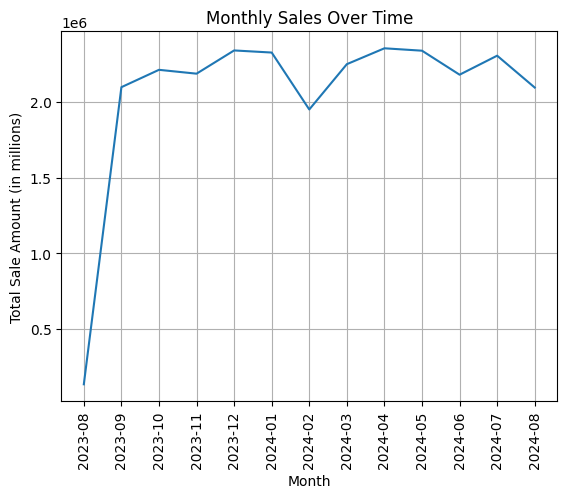

In [834]:
# Might be easier looking at the data in a graph
plt.plot(monthly_sales['Month of Purchase'], monthly_sales['Total Sale Amount'])

# labels and title
plt.xlabel('Month')
plt.ylabel('Total Sale Amount (in millions)')
plt.title('Monthly Sales Over Time')
plt.grid(True)
plt.xticks(rotation=90)

plt.show()

In [835]:
# find and siplay the Best month
most_sold = monthly_sales['Total Sale Amount'].max()

monthly_sales[monthly_sales['Total Sale Amount'] == most_sold]

,Month of Purchase,Total Sale Amount
8,2024-04,2354120.89


In [836]:
first_sale = df['Date of Purchase'].min().strftime('%Y-%m-%d')
first_sale

'2023-08-30'

In [837]:
avg_sales = monthly_sales['Total Sale Amount'].mean().round(2)
avg_sales

2058939.35

# ANSWER: What are the total sales and revenue trends over time?

#### August 2023 seems to be the start of our sales data. This month is showing as the lowest overall month. But when we check sales data for that month we dont have any sales until 08-30. So it is not all  that weird to have this as the lowest month.

The rest of our months are around the same average ($2,058,939.35), with 2024-02 being are actual lowest month of sales.

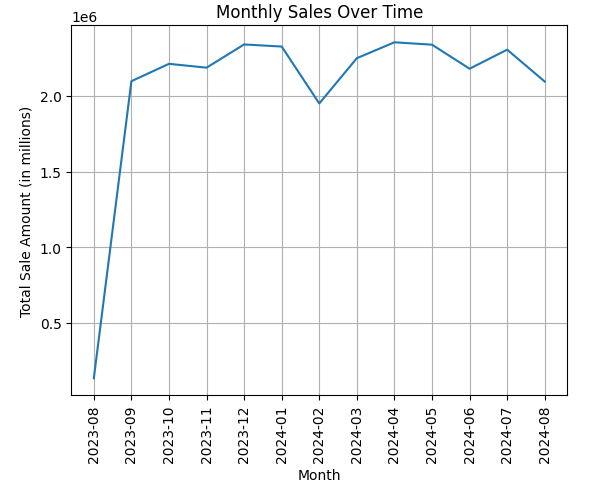


# Question: **Which product categories are generating the most revenue?**
  - Compare total sales by product category to determine which categories are most profitable.
      - **Answer** - We need 'Product Category', and 'Total Sale Amount'  We probably dont need dates since we just want overall most revenue.

In [838]:
best_category = df.groupby('Product Category')['Total Sale Amount'].sum().reset_index()

best_category = best_category.sort_values(by='Total Sale Amount', ascending=False).reset_index(drop=True)
best_category

,Product Category,Total Sale Amount
0,Toys & Games,5466037.49
1,Home & Kitchen,5451456.70
2,Books,5372058.94
3,Electronics,5276310.30
4,Clothing,5200348.15


In [839]:
top_sales = best_category.iloc[0]['Total Sale Amount']
second_top_sales = best_category.iloc[1]['Total Sale Amount']

# Calculate the percentage difference
percentage_difference = (((top_sales - second_top_sales) / top_sales) * 100).round(2)
percentage_difference

0.27

# ANSWER: Which product categories are generating the most revenue?

### The top categories are <code>Toys & Games | Home & Kitchen</code> both with about <mark>$5,450,000</mark> in Sales.
#### The difference between them is less than half of a percent. So I wouldnt call either one the TOP category.

# Question: **What are the top-selling products?**

  - Identify products with the highest quantity sold or total sales amount.
       - **Answer** - Similar to above we are just wanting top products, so we need 'Total Sale Amount' and 'Product Name' since that is most relevant.

In [840]:
best_product = df.groupby('Product Name')['Total Sale Amount'].sum().reset_index()

best_product = best_product.sort_values(by='Total Sale Amount', ascending=False).reset_index(drop=True)
best_product

,Product Name,Total Sale Amount
0,Product B,5618308.41
1,Product C,5436385.61
2,Product D,5260008.91
3,Product E,5256086.60
4,Product A,5195422.05


In [841]:
top_product = best_product.iloc[0]['Total Sale Amount']
second_top_product = best_product.iloc[1]['Total Sale Amount']

# Calculate the percentage difference
perc_difference = (((top_product - second_top_product) / top_product) * 100).round(2)
perc_difference

3.24

# ANSWER: What are the top-selling products?

### The top two products are <code>Product B | Product C</code>
#### The difference between them is 3 percent. So I would say that is good enough to call Product B the best seller.

#### <mark>$5,618,308.41</mark> of Product B has been sold

# Question: Customer Behavior Insights

- **What is the distribution of customers by age and gender?**
  - Create visualizations to understand the demographics of your customer base.
       - **Answer** - We need customer demographics data, so lets grab 'Customer Age', 'Gender',and 'Location' just so we have the data incase we want to map.

In [842]:
# Just want to remind myself what data we have
list(df.columns)

['Transaction ID',
 'Date of Purchase',
 'Product Category',
 'Product ID',
 'Quantity Sold',
 'Unit Price',
 'Total Sale Amount',
 'Customer ID',
 'Customer Age',
 'Gender',
 'Location (City/State/Country)',
 'Signup Date',
 'Product Name',
 'Stock Quantity',
 'Supplier',
 'Campaign ID',
 'Campaign Name',
 'Start Date',
 'End Date',
 'Budget',
 'Channels Used',
 'Number of Impressions',
 'Click-through Rate (CTR)',
 'Conversion Rate',
 'Month of Purchase']

In [843]:
customer_demo = df[['Customer Age','Gender', 'Location (City/State/Country)']]
customer_demo

,Customer Age,Gender,Location (City/State/Country)
0,29,Female,Ericashire/North Carolina/New Zealand
1,38,Male,East Natalie/Michigan/Mauritania
2,27,Male,East Victorport/Iowa/Brazil
3,25,Male,New Michaelton/Louisiana/Guatemala
4,50,Female,South Ryanhaven/Oklahoma/Reunion
...,...,...,...
9995,58,Male,Brandyfort/Kentucky/Maldives
9996,29,Female,South Crystalstad/Mississippi/Singapore
9997,41,Female,New Billy/Utah/United States of America
9998,68,Female,Madisonhaven/Louisiana/Guatemala


In [844]:
# that looks like the info we want. But lets separate our location data into separate columns
customer_demo[['City', 'State', 'Country']] = customer_demo['Location (City/State/Country)'].str.split("/", n=2, expand=True)
customer_demo = customer_demo.drop(columns='Location (City/State/Country)')
customer_demo

/tmp/ipykernel_36/1286185173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_demo[['City', 'State', 'Country']] = customer_demo['Location (City/State/Country)'].str.split("/", n=2, expand=True)
/tmp/ipykernel_36/1286185173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_demo[['City', 'State', 'Country']] = customer_demo['Location (City/State/Country)'].str.split("/", n=2, expand=True)
/tmp/ipykernel_36/1286185173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy 

,Customer Age,Gender,City,State,Country
0,29,Female,Ericashire,North Carolina,New Zealand
1,38,Male,East Natalie,Michigan,Mauritania
2,27,Male,East Victorport,Iowa,Brazil
3,25,Male,New Michaelton,Louisiana,Guatemala
4,50,Female,South Ryanhaven,Oklahoma,Reunion
...,...,...,...,...,...
9995,58,Male,Brandyfort,Kentucky,Maldives
9996,29,Female,South Crystalstad,Mississippi,Singapore
9997,41,Female,New Billy,Utah,United States of America
9998,68,Female,Madisonhaven,Louisiana,Guatemala


In [845]:
# Now that we have our data we can group by age, gender, and country (and possibly state. City is too small to worry about)

# Gender
gender_counts = customer_demo['Gender'].value_counts().reset_index()
gender_counts

,Gender,count
0,Female,5040
1,Male,4960


In [846]:
# Average age
avg_age = customer_demo['Customer Age'].mean().round(1)
avg_age

43.7

In [847]:
# Average age by Gender
avg_age_by_gender = customer_demo.groupby('Gender')['Customer Age'].mean().round(1).reset_index()
avg_age_by_gender

,Gender,Customer Age
0,Female,43.6
1,Male,43.9


In [848]:
# Lets look at ages in groups
bins = [0, 20, 30, 40, 50, 60, 100] # These are our age ranges
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']


customer_demo['Age Bucket'] = pd.cut(customer_demo['Customer Age'], bins=bins, labels=labels, right=False)

cust_ages = customer_demo['Age Bucket'].value_counts().reset_index()
cust_ages

,Age Bucket,count
0,60+,2066
1,21-30,1918
2,41-50,1894
3,31-40,1866
4,51-60,1821
5,0-20,435


/tmp/ipykernel_36/1597978196.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bucket_counts = customer_demo.groupby(['Gender', 'Age Bucket']).size().reset_index(name='Count')
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and s

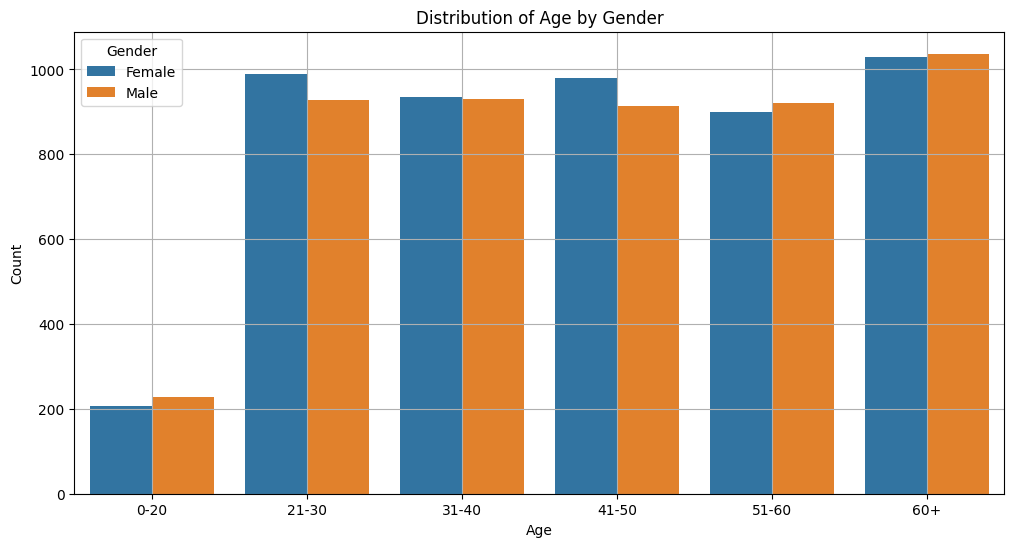

In [849]:
# Lets see if we can graph the distribution of age and gender

# count of each age by gender
age_bucket_counts = customer_demo.groupby(['Gender', 'Age Bucket']).size().reset_index(name='Count')



# Plot the counts of age by gender
plt.figure(figsize=(12, 6))
sns.barplot(data=age_bucket_counts, x='Age Bucket', y='Count', hue='Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age by Gender')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

In [850]:
# Count by Country
country_counts = customer_demo['Country'].value_counts().reset_index()
country_counts

,Country,count
0,Korea,108
1,Congo,98
2,Bhutan,58
3,Panama,58
4,Hong Kong,55
...,...,...
238,Uzbekistan,27
239,Luxembourg,27
240,Argentina,27
241,Niue,26


In [851]:
# Thats too many. So lets look at just the top 5
country_counts.head(5)

,Country,count
0,Korea,108
1,Congo,98
2,Bhutan,58
3,Panama,58
4,Hong Kong,55


In [852]:
# Count by State
city_counts = customer_demo['State'].value_counts().reset_index()
city_counts.head(5)

,State,count
0,Michigan,233
1,Arizona,224
2,North Carolina,222
3,Wyoming,219
4,North Dakota,219


### These numbers didnt make sense because several states had hundreds of sales, but USA was not in the top 5 countries. And the top country had only 108 sales.

#### When I looked closer I noticed that our Data generator had given every single row a 'State' Even if they were out of the US.

In [853]:
customer_demo[customer_demo['Country'].str.contains('United States', case=False)]

,Customer Age,Gender,City,State,Country,Age Bucket
22,54,Male,Melanieview,Mississippi,United States Virgin Islands,51-60
90,70,Female,South Ashleyside,Indiana,United States Minor Outlying Islands,60+
98,65,Female,Loganton,New York,United States Virgin Islands,60+
162,45,Female,New Bradleyburgh,Massachusetts,United States Virgin Islands,41-50
376,21,Female,West Kevin,West Virginia,United States Virgin Islands,21-30
...,...,...,...,...,...,...
9273,69,Female,Maryfurt,North Carolina,United States of America,60+
9728,27,Female,Amyburgh,Montana,United States Virgin Islands,21-30
9855,43,Female,New Ricky,Massachusetts,United States Virgin Islands,41-50
9990,21,Female,New Pamelaport,Missouri,United States Virgin Islands,21-30


In [854]:
# Let's see if we can fix this data
us_customers = customer_demo[customer_demo['Country'].str.contains('United States', case=False)]


to_remove = ['Virgin Islands', 'Minor Outlying Islands', 'of America']

# Apply stripping
for x in to_remove:
    us_customers['Country'] = us_customers['Country'].str.replace(x, '', regex=False).str.strip()

# Ensure there are no extra spaces and standardize to 'United States'
us_customers['Country'] = us_customers['Country'].replace('', 'United States')

us_customers

/tmp/ipykernel_36/3697754323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_customers['Country'] = us_customers['Country'].str.replace(x, '', regex=False).str.strip()
/tmp/ipykernel_36/3697754323.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_customers['Country'] = us_customers['Country'].replace('', 'United States')


,Customer Age,Gender,City,State,Country,Age Bucket
22,54,Male,Melanieview,Mississippi,United States,51-60
90,70,Female,South Ashleyside,Indiana,United States,60+
98,65,Female,Loganton,New York,United States,60+
162,45,Female,New Bradleyburgh,Massachusetts,United States,41-50
376,21,Female,West Kevin,West Virginia,United States,21-30
...,...,...,...,...,...,...
9273,69,Female,Maryfurt,North Carolina,United States,60+
9728,27,Female,Amyburgh,Montana,United States,21-30
9855,43,Female,New Ricky,Massachusetts,United States,41-50
9990,21,Female,New Pamelaport,Missouri,United States,21-30


In [855]:
# Lets apply this to our data now
df_updated = customer_demo.merge(us_customers, how='left', on=['Customer Age', 'Gender', 'City', 'State'], suffixes=('', '_updated'))

if 'Country_updated' in df_updated.columns:
    df_updated['Country'] = df_updated['Country_updated'].fillna(df_updated['Country'])
    
df_updated = df_updated.drop(columns=['Country_updated'], errors='ignore')
df_updated = df_updated.drop(columns=['Age Bucket_updated'], errors='ignore')

customer_demo = df_updated

customer_demo

,Customer Age,Gender,City,State,Country,Age Bucket
0,29,Female,Ericashire,North Carolina,New Zealand,21-30
1,38,Male,East Natalie,Michigan,Mauritania,31-40
2,27,Male,East Victorport,Iowa,Brazil,21-30
3,25,Male,New Michaelton,Louisiana,Guatemala,21-30
4,50,Female,South Ryanhaven,Oklahoma,Reunion,51-60
...,...,...,...,...,...,...
9995,58,Male,Brandyfort,Kentucky,Maldives,51-60
9996,29,Female,South Crystalstad,Mississippi,Singapore,21-30
9997,41,Female,New Billy,Utah,United States,41-50
9998,68,Female,Madisonhaven,Louisiana,Guatemala,60+


In [856]:
# Lets also remove state values from countries that arent United States



# USE THE '~' to select ones that DO NOT contain the string you ask for
us_mask = ~df_updated['Country'].str.contains('United States', case=False)

df_updated.loc[us_mask, 'State'] = ''

customer_demo['State'] = df_updated['State']

customer_demo

,Customer Age,Gender,City,State,Country,Age Bucket
0,29,Female,Ericashire,,New Zealand,21-30
1,38,Male,East Natalie,,Mauritania,31-40
2,27,Male,East Victorport,,Brazil,21-30
3,25,Male,New Michaelton,,Guatemala,21-30
4,50,Female,South Ryanhaven,,Reunion,51-60
...,...,...,...,...,...,...
9995,58,Male,Brandyfort,,Maldives,51-60
9996,29,Female,South Crystalstad,,Singapore,21-30
9997,41,Female,New Billy,Utah,United States,41-50
9998,68,Female,Madisonhaven,,Guatemala,60+


In [857]:
# Now that we have corrected our data lets look at the numbers again

# Count by Country
country_counts = customer_demo['Country'].value_counts().reset_index()
country_counts

,Country,count
0,United States,124
1,Korea,108
2,Congo,98
3,Bhutan,58
4,Panama,58
...,...,...
236,Luxembourg,27
237,Uzbekistan,27
238,Argentina,27
239,Niue,26


In [858]:
# Count by State
state_counts = customer_demo['State'].value_counts().reset_index()
state_counts.head(10)

# So now we can see that 9876 values are NOT from the United States. And now we can see true values of state counts

,State,count
0,,9876
1,Indiana,7
2,Montana,7
3,New York,5
4,Massachusetts,5
5,Illinois,5
6,Kansas,5
7,Utah,5
8,Arkansas,4
9,California,4


## Lets recount all our demograhic numbers

In [859]:
gender_counts

,Gender,count
0,Female,5040
1,Male,4960


In [860]:
avg_age

43.7

In [861]:
avg_age_by_gender

,Gender,Customer Age
0,Female,43.6
1,Male,43.9


In [862]:
cust_ages

,Age Bucket,count
0,60+,2066
1,21-30,1918
2,41-50,1894
3,31-40,1866
4,51-60,1821
5,0-20,435


In [863]:
# Top country
country_counts.head(1)

,Country,count
0,United States,124


In [864]:
# Top State
list(state_counts.iloc[1])

['Indiana', 7]

# ANSWER: What is the distribution of customers by age and gender?

### Total count 
* Females: 5040
* Males: 4960

### Avg age by Gender
* Females: 43.6
* Males: 43.9
* *Avg Age overall: 43.7*

### Age count
* **0-20:** 435
* **51-60:** 1821
* **31-40:** 1866
* **41-50:** 1894
* **21-30:** 1918
* **60:** 2066


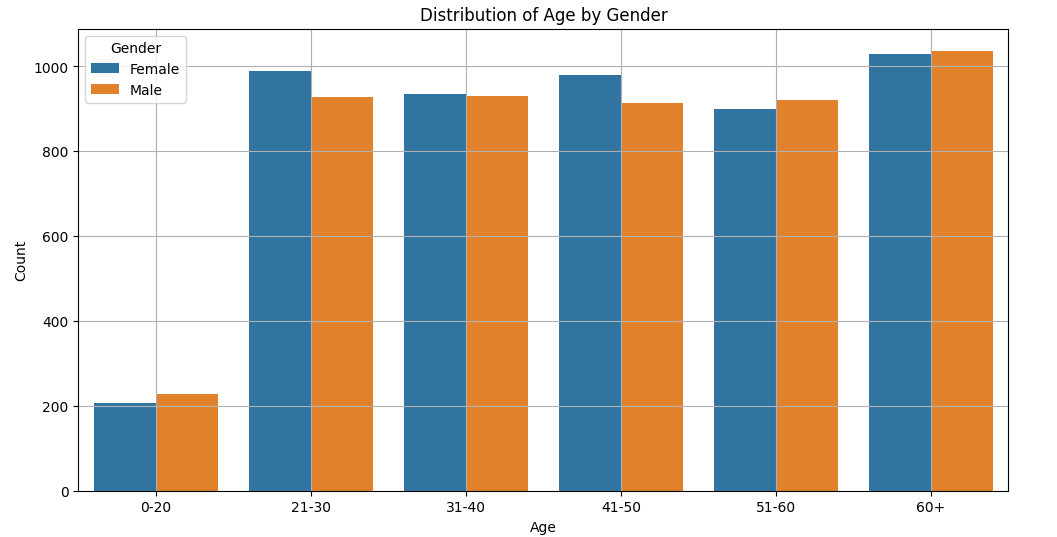

# Question: **Where are your customers located?**

  - Map customer locations to identify geographic patterns and potential areas for market expansion.
      - **Answer** - we need 'Customer ID', and 'Location'

In [865]:
# I believe I still have location data in our customer_demo data

customer_demo

,Customer Age,Gender,City,State,Country,Age Bucket
0,29,Female,Ericashire,,New Zealand,21-30
1,38,Male,East Natalie,,Mauritania,31-40
2,27,Male,East Victorport,,Brazil,21-30
3,25,Male,New Michaelton,,Guatemala,21-30
4,50,Female,South Ryanhaven,,Reunion,51-60
...,...,...,...,...,...,...
9995,58,Male,Brandyfort,,Maldives,51-60
9996,29,Female,South Crystalstad,,Singapore,21-30
9997,41,Female,New Billy,Utah,United States,41-50
9998,68,Female,Madisonhaven,,Guatemala,60+


In [866]:
# just rechecking if there were any other locale data points we could use
list(df.columns)

# Lets stick with customer_demo since we already cleaned up the Location columns

['Transaction ID',
 'Date of Purchase',
 'Product Category',
 'Product ID',
 'Quantity Sold',
 'Unit Price',
 'Total Sale Amount',
 'Customer ID',
 'Customer Age',
 'Gender',
 'Location (City/State/Country)',
 'Signup Date',
 'Product Name',
 'Stock Quantity',
 'Supplier',
 'Campaign ID',
 'Campaign Name',
 'Start Date',
 'End Date',
 'Budget',
 'Channels Used',
 'Number of Impressions',
 'Click-through Rate (CTR)',
 'Conversion Rate',
 'Month of Purchase']

In [867]:
countries = customer_demo['Country'].value_counts().reset_index()
countries

,Country,count
0,United States,124
1,Korea,108
2,Congo,98
3,Bhutan,58
4,Panama,58
...,...,...
236,Luxembourg,27
237,Uzbekistan,27
238,Argentina,27
239,Niue,26


In [868]:
# lets filter the data down a little so we arent looking at as many countries
filtered_counts = countries[countries['count'] > 50]
filtered_counts

,Country,count
0,United States,124
1,Korea,108
2,Congo,98
3,Bhutan,58
4,Panama,58
5,Hong Kong,55
6,Iraq,55
7,Guam,54
8,Slovenia,54
9,Tokelau,53


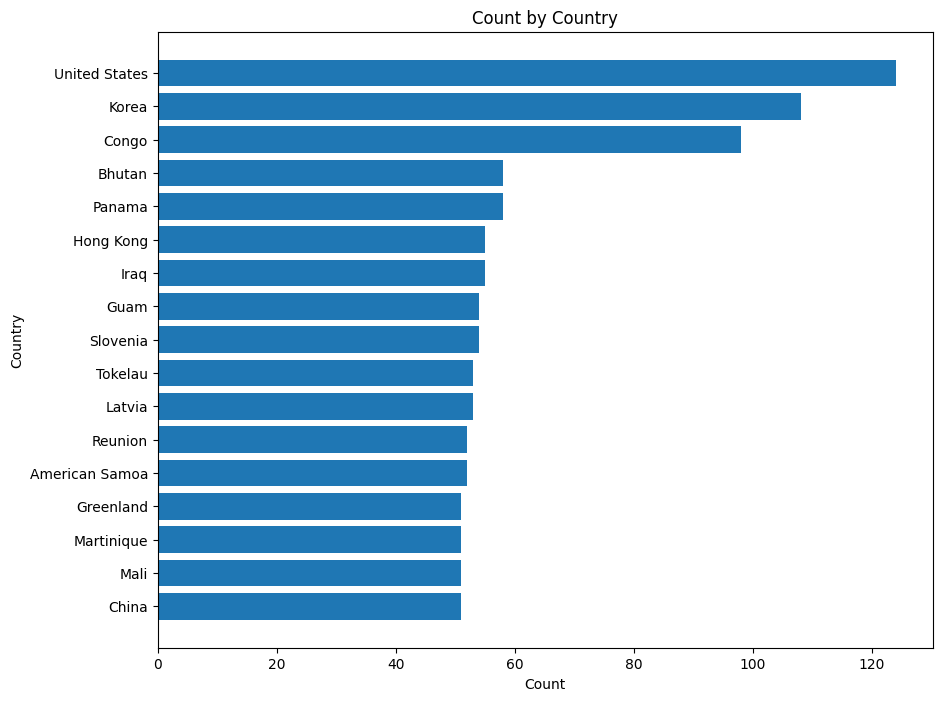

In [869]:
plt.figure(figsize=(10, 8))
plt.barh(filtered_counts['Country'], filtered_counts['count'])
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Count by Country')
plt.gca().invert_yaxis()
plt.show()

# ANSWER: Where are your customers located?

### Total counts:
* **United States**: 124
* **Korea**: 108
* **Congo**: 98
* **Bhutan**: 58
* **Panama**: 58
* **Hong Kong**: 55

#### Graphed Country Count

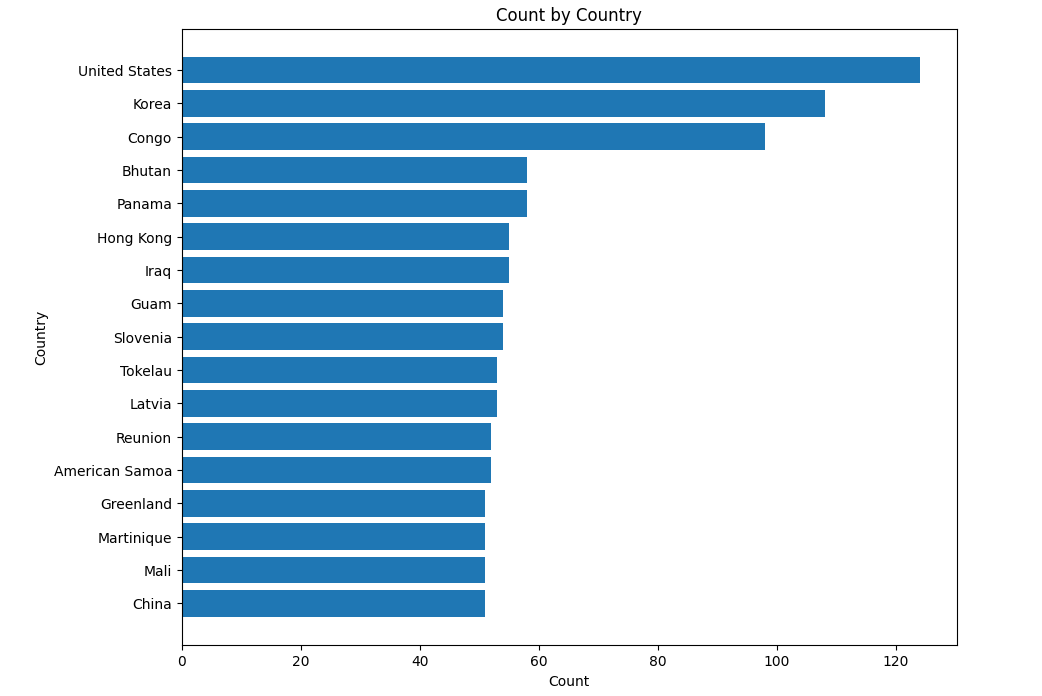

# Question: **How does customer acquisition vary over time?**

  - Analyze the number of new customers acquired each month or quarter.
     - **Answer** - We will need to find the first 'Transaction ID' grouped by 'Customer ID' so we can see new customers and graph acuisition.
     - **Answer: CONT** We can save this as a separate filtered_counts so we can group with campaign data later.

In [870]:
# think I want to go back to our original dataframe and possibly the month of purchase column we created earlier
new_customers = df.copy()
new_customers.nunique()

Transaction ID                   10000
Date of Purchase                   366
Product Category                     5
Product ID                       10000
Quantity Sold                       20
Unit Price                        9013
Total Sale Amount                 9848
Customer ID                      10000
Customer Age                        53
Gender                               2
Location (City/State/Country)    10000
Signup Date                       1096
Product Name                         5
Stock Quantity                    1000
Supplier                             3
Campaign ID                      10000
Campaign Name                     9968
Start Date                         366
End Date                           349
Budget                            9992
Channels Used                      325
Number of Impressions             9966
Click-through Rate (CTR)           901
Conversion Rate                   2817
Month of Purchase                   13
dtype: int64

In [871]:
# The plan was to use customer_id. I was thinking some customers would be repeat customers. But it seems like our data has 10000 unique customers. 
# So lets calculate how many orders we had per month and try to calcualte our acquisition from that

new_customers = new_customers.groupby(by='Month of Purchase').size().reset_index(name='Number of Orders')

new_customers

,Month of Purchase,Number of Orders
0,2023-08,50
1,2023-09,780
2,2023-10,815
3,2023-11,801
4,2023-12,890
5,2024-01,878
6,2024-02,762
7,2024-03,833
8,2024-04,843
9,2024-05,877


In [872]:
new_customers['diff_prev_month'] = new_customers['Number of Orders'].diff()

new_customers

,Month of Purchase,Number of Orders,diff_prev_month
0,2023-08,50,NaN
1,2023-09,780,730.0
2,2023-10,815,35.0
3,2023-11,801,-14.0
4,2023-12,890,89.0
5,2024-01,878,-12.0
6,2024-02,762,-116.0
7,2024-03,833,71.0
8,2024-04,843,10.0
9,2024-05,877,34.0


## This seems to be a downside of using AI to make our dataset. The data is too uniform and unrealistic.

### Lets try and calculate some sore of acquisition rate even though looking at these orders there isnt much to go on.

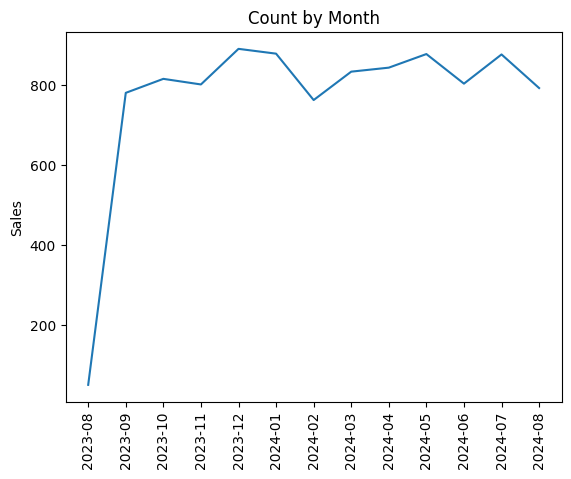

In [873]:
plt.plot(new_customers['Month of Purchase'], new_customers['Number of Orders'])
plt.ylabel('Sales')
plt.title('Count by Month')
plt.xticks(rotation=90)
plt.show()

## When you compare our number of sales vs revnue per month from earlier. They look almost identical.

### <mark>This might happen in real world data as well. but defnitely anotehr sign of AI data because of how uniform it is.</mark>

## Total Revenue per month

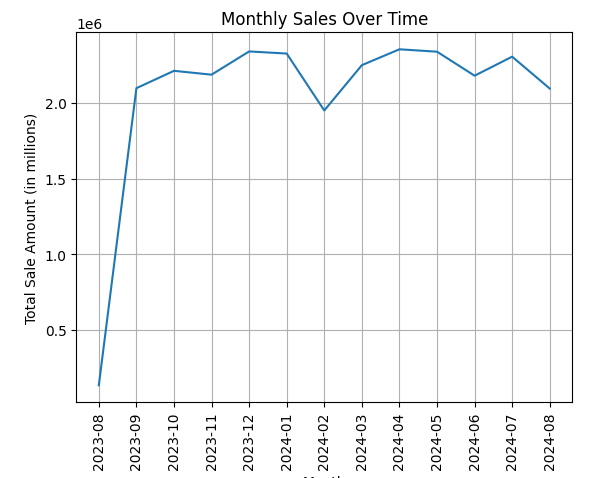

## Total Sales per month

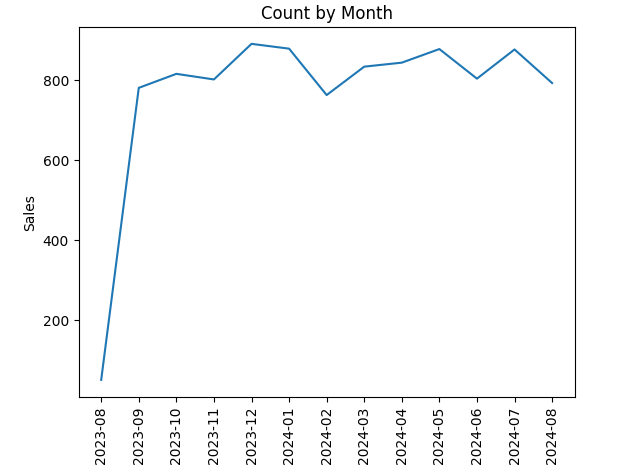

# ANSWER: **How does customer acquisition vary over time?**


#### *August in both years is incomplete, so those months can be ignored.*

#### The **biggest JUMP in sales was between 2023-11 and 2023-12**. 
_(I GUESS we could say this was christmas?? Keep in mind our data was AI generated and it probably did not calculate holidays.)_
    
---
#### The **biggest LOSS in sales was between 2021-01 and 2024-02**.
_(I GUESS we could contribute this to new year resolutions to Save money??)_

# Question: **What is the current inventory status of each product?**

  - Monitor stock levels to avoid stockouts or overstocking.
       - **Answer** - We only need 'Product Name' and 'Stock Quantity' We can store this separately for the sole purpose of inventory tracking.
       - **Answer CONT** Either us as analysts or a data engineer may want to streamline this data pipeline for actual inventory tracking.
       - **Answer CONT** This should almost always already be part of a companies data structure though since its one of the first things you would set up.

In [874]:
df.columns

Index(['Transaction ID', 'Date of Purchase', 'Product Category', 'Product ID',
       'Quantity Sold', 'Unit Price', 'Total Sale Amount', 'Customer ID',
       'Customer Age', 'Gender', 'Location (City/State/Country)',
       'Signup Date', 'Product Name', 'Stock Quantity', 'Supplier',
       'Campaign ID', 'Campaign Name', 'Start Date', 'End Date', 'Budget',
       'Channels Used', 'Number of Impressions', 'Click-through Rate (CTR)',
       'Conversion Rate', 'Month of Purchase'],
      dtype='object')

In [875]:
inventory = df[['Product Name', 'Stock Quantity', 'Month of Purchase']]
inventory

,Product Name,Stock Quantity,Month of Purchase
0,Product B,654,2023-11
1,Product E,849,2024-01
2,Product C,921,2024-05
3,Product B,865,2024-04
4,Product B,165,2024-03
...,...,...,...
9995,Product B,210,2024-05
9996,Product E,153,2024-02
9997,Product B,763,2023-10
9998,Product E,737,2023-10


In [876]:
monthly_stock = inventory.groupby(by=['Product Name', 'Month of Purchase']).sum().reset_index()
monthly_stock

,Product Name,Month of Purchase,Stock Quantity
0,Product A,2023-08,6761
1,Product A,2023-09,76970
2,Product A,2023-10,83796
3,Product A,2023-11,82366
4,Product A,2023-12,85883
...,...,...,...
60,Product E,2024-04,81455
61,Product E,2024-05,80994
62,Product E,2024-06,89123
63,Product E,2024-07,82270


In [877]:
# August 2023 is going to skew inventory because we didnt have a full month of data to work with.
# So lets drop aug 2023 before we move on

monthly_stock = monthly_stock[monthly_stock['Month of Purchase'] != '2023-08']
monthly_stock = monthly_stock[monthly_stock['Month of Purchase'] != '2024-08']
monthly_stock

,Product Name,Month of Purchase,Stock Quantity
1,Product A,2023-09,76970
2,Product A,2023-10,83796
3,Product A,2023-11,82366
4,Product A,2023-12,85883
5,Product A,2024-01,88340
6,Product A,2024-02,68744
7,Product A,2024-03,80289
8,Product A,2024-04,90456
9,Product A,2024-05,88959
10,Product A,2024-06,76273


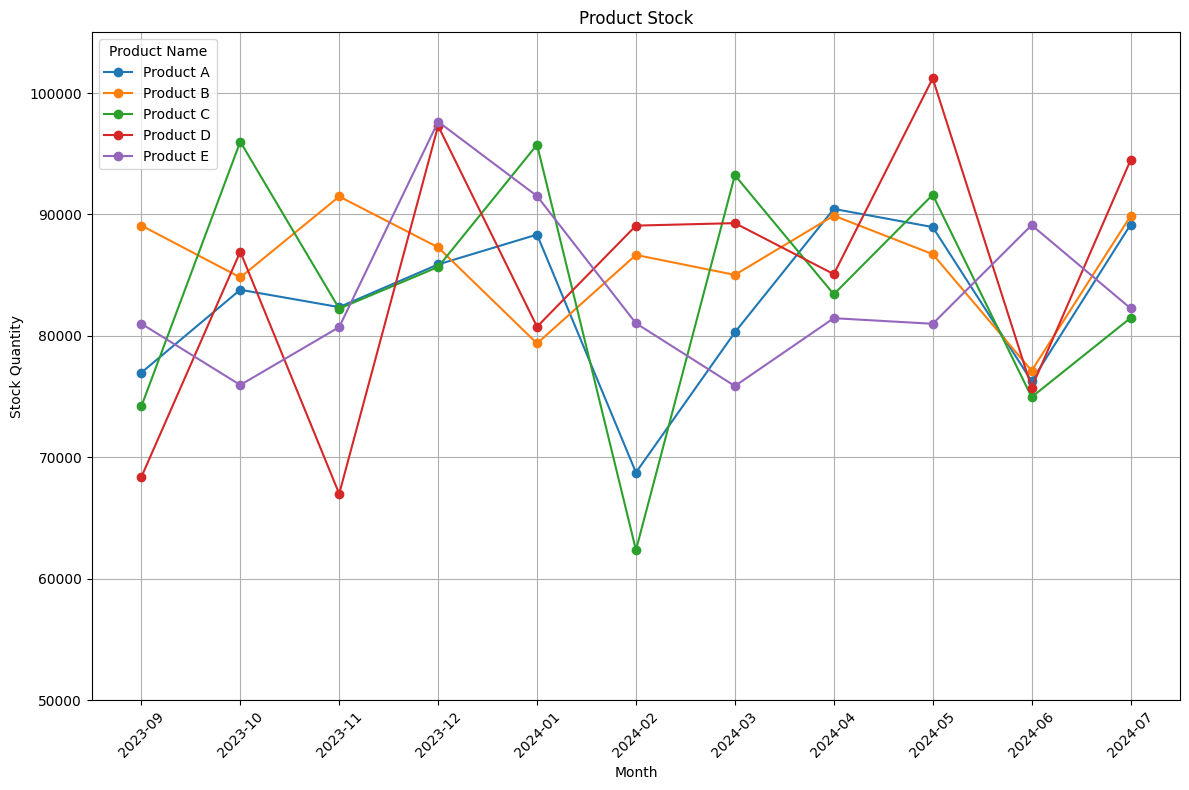

In [878]:
# Pivot the table to have 'Month of Purchase' as index and 'Product Name' as columns
stock_chart = monthly_stock.pivot(index= 'Month of Purchase', columns= 'Product Name', values= 'Stock Quantity')

# Plot
plt.figure(figsize=(12, 8))
for product in stock_chart.columns:
    plt.plot(stock_chart.index, stock_chart[product], marker='o', label=product)

plt.title('Product Stock')
plt.xlabel('Month')
plt.ylabel('Stock Quantity')
plt.legend(title='Product Name')
plt.grid(True)
plt.xticks(rotation=45)

# Adjust y-axis limits of the chart
plt.ylim(bottom=50000, top=105000)

plt.tight_layout()
plt.show()

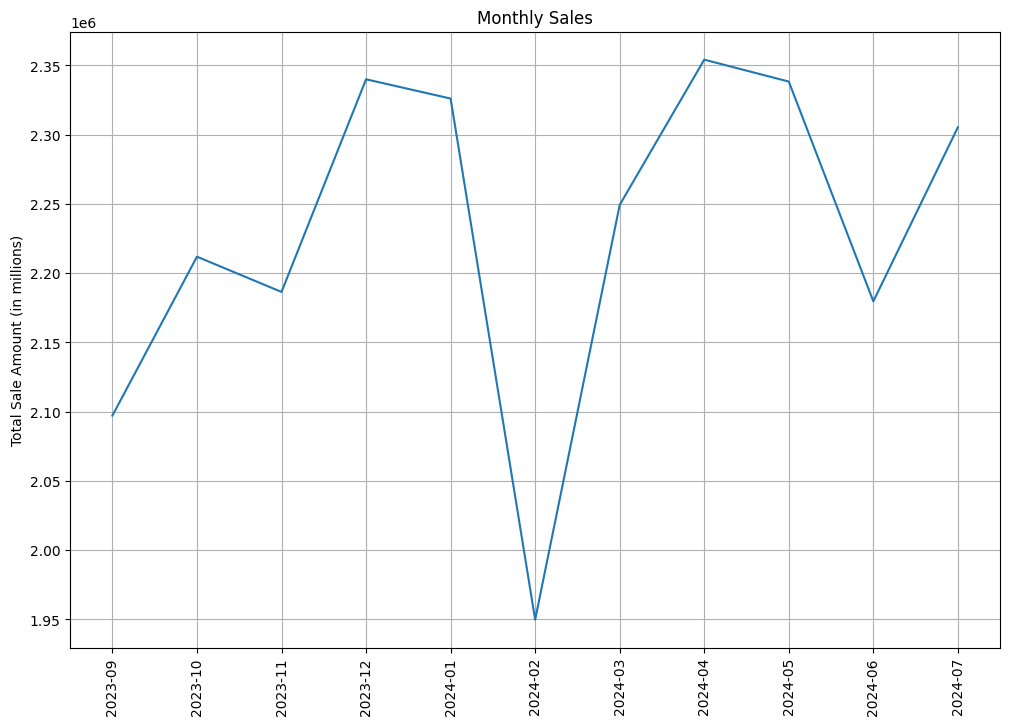

In [879]:
# Lets compare our stock numbers to our orders

# Lets drop our two August months with incomplete data
monthly_sales = monthly_sales[monthly_sales['Month of Purchase'] != '2023-08']
monthly_sales = monthly_sales[monthly_sales['Month of Purchase'] != '2024-08']

plt.figure(figsize=(12, 8))
plt.plot(monthly_sales['Month of Purchase'], monthly_sales['Total Sale Amount'])

# labels and title
plt.ylabel('Total Sale Amount (in millions)')
plt.title('Monthly Sales')
plt.grid(True)
plt.xticks(rotation=90)

plt.show()

# ANSWER: **What is the current inventory status of each product?**


#### * *August in both years is incomplete, so those months can be dropped and ignored.*

#### - Most of our products follow a common stock trend of rising/falling month to month. 
#### - Product C had big months in 2024-01 and took a big stock dip in 2024-02.
#### Product E was the only product to have good stock in 2024-06, with every other product taking a big dip.

---

## When we compare stock to sales we see an unusual trend of stock dipping at the same time the sales dip.

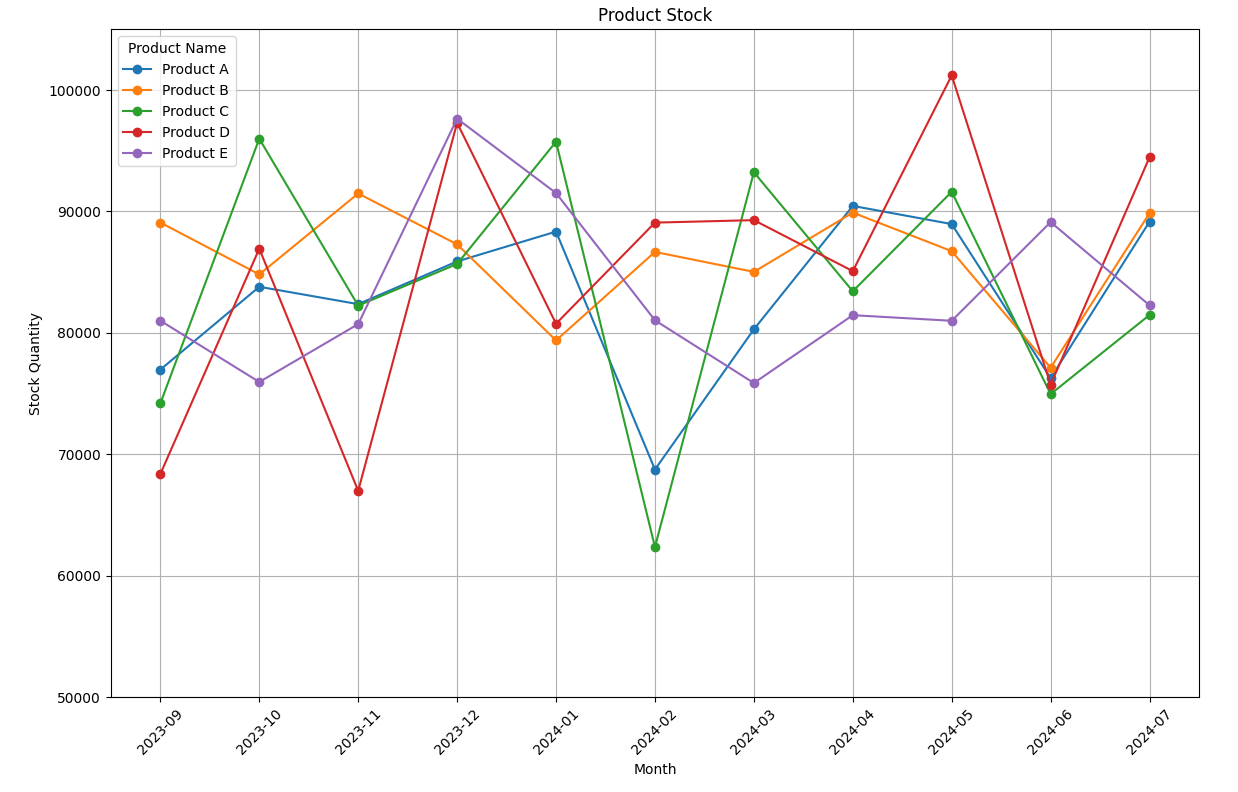

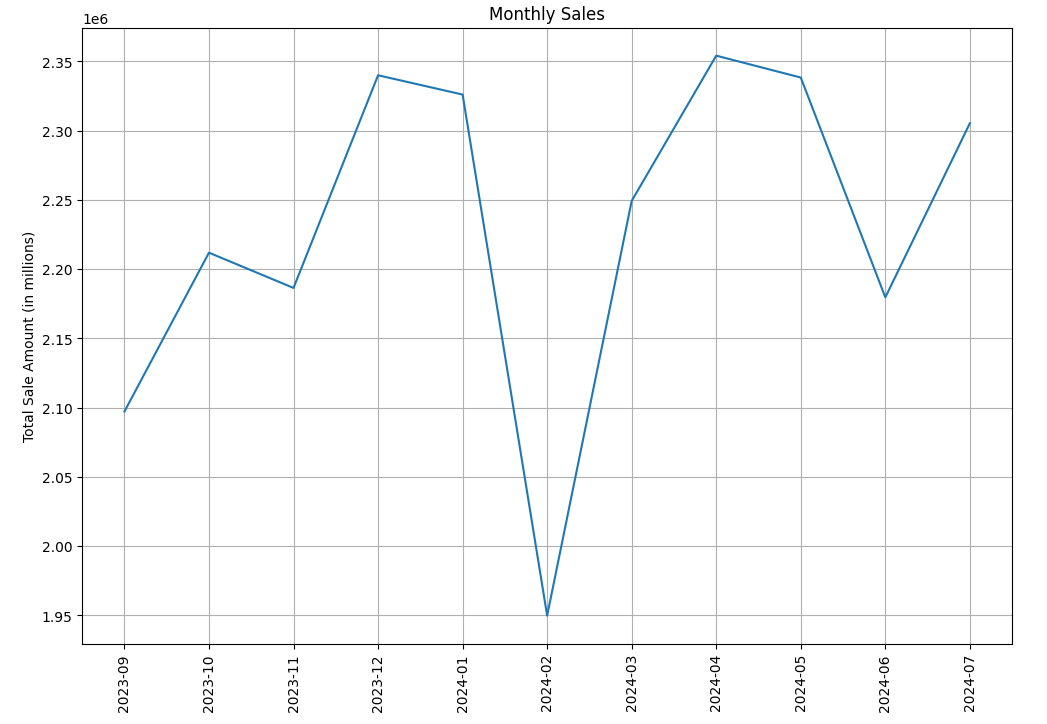


### This could be caused be the ordering stystem and how it is set up, OR it could be because this data was produced by AI and doesnt understand correlation

# Question: **Which marketing campaigns have been the most successful?**

  - Evaluate campaigns based on metrics like CTR, conversion rate, and ROI.
       - **Answer** - We will need to group 'Campaign Name' by time durations between 'Start Date' and 'End Date'. 
       - **Answer CONT** We can then look at the 'Total Sale Amount' during and after each of those times. Then look at the top 'Campaign Name' in that data.

In [880]:
# I would love to answer this question. But our data has a little issue.
# Let me show you the problem

# almost every single Campaign Name is unique. 
df['Campaign Name'].nunique()

9968

In [881]:
# there are no NA values. 
df['Campaign Name'].isna().sum()

0

In [882]:
# So every single transaction was a separate Campaign. 
# Which means it will be a lot like our other data and just directly follow the same trend line and have no meaning or correlation.


# lets take a look at the data anyways
campaigns = df[['Campaign Name', 'Start Date',  'End Date']]
campaigns

,Campaign Name,Start Date,End Date
0,Innovative bandwidth-monitored conglomeration,2023-12-06,2024-01-05
1,Fundamental intermediate artificial intelligence,2023-12-22,2023-12-31
2,Advanced content-based implementation,2024-03-10,2024-07-01
3,Synergistic empowering monitoring,2024-02-25,2024-07-03
4,Configurable bi-directional benchmark,2024-05-08,2024-05-13
...,...,...,...
9995,Automated asymmetric superstructure,2024-08-13,2024-08-24
9996,Integrated solution-oriented paradigm,2024-04-05,2024-07-01
9997,Programmable stable help-desk,2024-03-02,2024-05-11
9998,Business-focused mission-critical approach,2024-05-02,2024-05-05


In [883]:
campaigns.dtypes

Campaign Name    object
Start Date       object
End Date         object
dtype: object

In [884]:
# Convert our dates to dates first

campaigns['Start Date'] = pd.to_datetime(campaigns['Start Date'])
campaigns['End Date'] = pd.to_datetime(campaigns['End Date'])
print(campaigns.dtypes)
campaigns

Campaign Name            object
Start Date       datetime64[ns]
End Date         datetime64[ns]
dtype: object


/tmp/ipykernel_36/2820916452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaigns['Start Date'] = pd.to_datetime(campaigns['Start Date'])
/tmp/ipykernel_36/2820916452.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaigns['End Date'] = pd.to_datetime(campaigns['End Date'])


,Campaign Name,Start Date,End Date
0,Innovative bandwidth-monitored conglomeration,2023-12-06,2024-01-05
1,Fundamental intermediate artificial intelligence,2023-12-22,2023-12-31
2,Advanced content-based implementation,2024-03-10,2024-07-01
3,Synergistic empowering monitoring,2024-02-25,2024-07-03
4,Configurable bi-directional benchmark,2024-05-08,2024-05-13
...,...,...,...
9995,Automated asymmetric superstructure,2024-08-13,2024-08-24
9996,Integrated solution-oriented paradigm,2024-04-05,2024-07-01
9997,Programmable stable help-desk,2024-03-02,2024-05-11
9998,Business-focused mission-critical approach,2024-05-02,2024-05-05


In [885]:
# I decided start data and end date were pointless and gave us way too many data points to look at.
# Lets restructure the data to use Month of Purchase so we have something to groupby and look at.

# lets take a look at the data anyways
campaigns = df[['Campaign Name', 'Month of Purchase']]
campaigns = campaigns.groupby('Month of Purchase')['Campaign Name'].size().reset_index()
campaigns = campaigns.rename(columns= {'Campaign Name' : 'Count'})
campaigns

,Month of Purchase,Count
0,2023-08,50
1,2023-09,780
2,2023-10,815
3,2023-11,801
4,2023-12,890
5,2024-01,878
6,2024-02,762
7,2024-03,833
8,2024-04,843
9,2024-05,877


In [886]:
# Lets again drop August 2023

campaigns = campaigns[campaigns['Month of Purchase'] != '2023-08']
campaigns

,Month of Purchase,Count
1,2023-09,780
2,2023-10,815
3,2023-11,801
4,2023-12,890
5,2024-01,878
6,2024-02,762
7,2024-03,833
8,2024-04,843
9,2024-05,877
10,2024-06,803


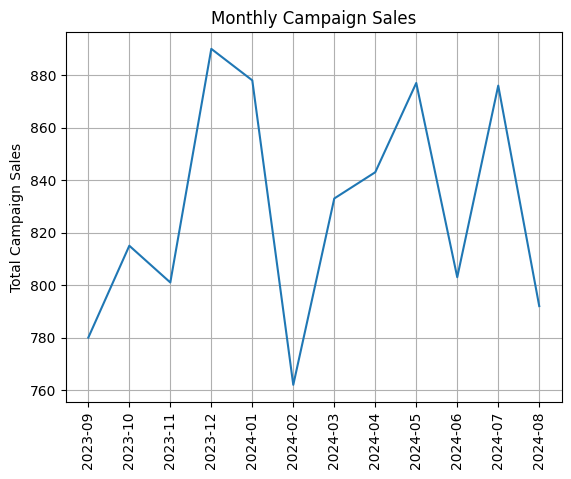

In [887]:
# Scatter plot for each campaign
plt.plot(campaigns['Month of Purchase'], campaigns['Count'])

# labels and title
plt.ylabel('Total Campaign Sales')
plt.title('Monthly Campaign Sales')
plt.grid(True)
plt.xticks(rotation=90)

plt.show()

# ANSWER: **Which marketing campaigns have been the most successful?**


### Since every transaction has BOTH a sale AND a Unique Campaign name. 
#### They are essentially identical data, just with a different value.
<br>

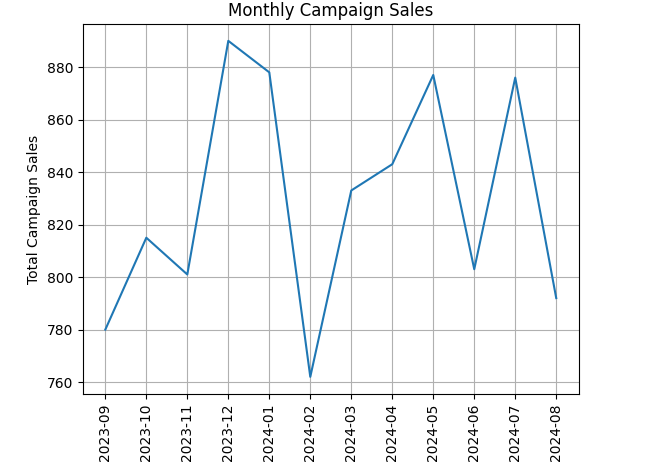

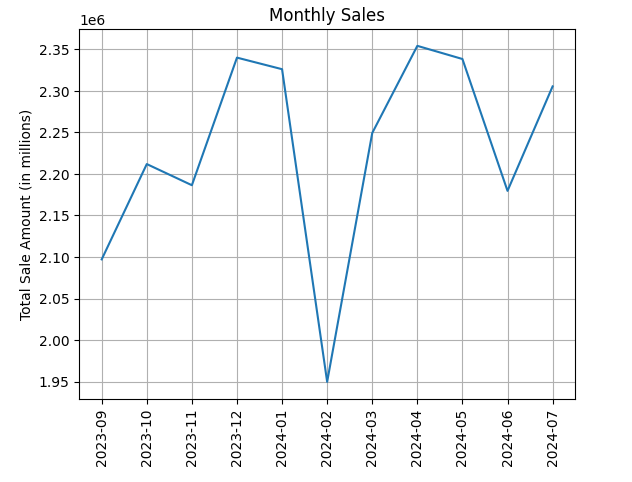

# Question: **How does campaign performance vary by time of year?**

  - Analyze if certain times of the year yield better results for specific types of campaigns.
       - **Answer** - Our data above can be used for this question. Except we will want to segment out the dates by time of year. We can easily do quarters.
       - **Answer CONT** Or if we wanted to get really technical we could look at dates around all the major retail holidays when people are known to spend more.

In [888]:
# This may be difficult to answer with our dataset. But lets give it a shot.

list(df.columns)


['Transaction ID',
 'Date of Purchase',
 'Product Category',
 'Product ID',
 'Quantity Sold',
 'Unit Price',
 'Total Sale Amount',
 'Customer ID',
 'Customer Age',
 'Gender',
 'Location (City/State/Country)',
 'Signup Date',
 'Product Name',
 'Stock Quantity',
 'Supplier',
 'Campaign ID',
 'Campaign Name',
 'Start Date',
 'End Date',
 'Budget',
 'Channels Used',
 'Number of Impressions',
 'Click-through Rate (CTR)',
 'Conversion Rate',
 'Month of Purchase']

In [897]:
# First lets gather our data
quarterly_campaigns = df[['Quantity Sold', 'Month of Purchase']]
quarterly_campaigns = quarterly_campaigns.groupby('Month of Purchase').sum()

quarterly_campaigns = quarterly_campaigns.reset_index()
quarterly_campaigns

,Month of Purchase,Quantity Sold
0,2023-08,464
1,2023-09,8317
2,2023-10,8643
3,2023-11,8336
4,2023-12,9447
5,2024-01,9032
6,2024-02,7818
7,2024-03,8818
8,2024-04,9095
9,2024-05,9309


In [898]:
quarterly_campaigns.dtypes

Month of Purchase    object
Quantity Sold         int64
dtype: object

In [899]:
quarterly_campaigns['Month of Purchase'] = pd.to_datetime(quarterly_campaigns['Month of Purchase'])
quarterly_campaigns

,Month of Purchase,Quantity Sold
0,2023-08-01,464
1,2023-09-01,8317
2,2023-10-01,8643
3,2023-11-01,8336
4,2023-12-01,9447
5,2024-01-01,9032
6,2024-02-01,7818
7,2024-03-01,8818
8,2024-04-01,9095
9,2024-05-01,9309


In [900]:
# Now lets group by quarters and take a look at our data


quarterly_bins = [
    pd.Timestamp('2023-07-01'),
    pd.Timestamp('2023-10-01'),
    pd.Timestamp('2024-01-01'),
    pd.Timestamp('2024-04-01'),
    pd.Timestamp('2024-07-01'),
    pd.Timestamp('2024-10-01')
]

quarterly_labels = ['Q3 2023', 'Q4 2023', 'Q1 2024', 'Q2 2024', 'Q3 2024']

quarterly_campaigns['Quarterly Bucket'] = pd.cut(quarterly_campaigns['Month of Purchase'], bins=quarterly_bins, labels=quarterly_labels, right=False)
quarterly_campaigns


,Month of Purchase,Quantity Sold,Quarterly Bucket
0,2023-08-01,464,Q3 2023
1,2023-09-01,8317,Q3 2023
2,2023-10-01,8643,Q4 2023
3,2023-11-01,8336,Q4 2023
4,2023-12-01,9447,Q4 2023
5,2024-01-01,9032,Q1 2024
6,2024-02-01,7818,Q1 2024
7,2024-03-01,8818,Q1 2024
8,2024-04-01,9095,Q2 2024
9,2024-05-01,9309,Q2 2024


In [901]:
quarterly_campaigns = quarterly_campaigns.drop(columns='Month of Purchase')
quarterly_campaigns

,Quantity Sold,Quarterly Bucket
0,464,Q3 2023
1,8317,Q3 2023
2,8643,Q4 2023
3,8336,Q4 2023
4,9447,Q4 2023
5,9032,Q1 2024
6,7818,Q1 2024
7,8818,Q1 2024
8,9095,Q2 2024
9,9309,Q2 2024


In [902]:
# Now lets sum our quantity sold by Quarter

quarterly_campaigns = quarterly_campaigns.groupby('Quarterly Bucket').sum()

quarterly_campaigns = quarterly_campaigns.reset_index()
quarterly_campaigns = quarterly_campaigns.rename(columns={'Quarterly Bucket': 'Quarter'})
quarterly_campaigns

/tmp/ipykernel_36/2465487608.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quarterly_campaigns = quarterly_campaigns.groupby('Quarterly Bucket').sum()


,Quarter,Quantity Sold
0,Q3 2023,8781
1,Q4 2023,26426
2,Q1 2024,25668
3,Q2 2024,26758
4,Q3 2024,17372


In [903]:
quarterly_campaigns.dtypes

Quarter          category
Quantity Sold       int64
dtype: object

In [904]:
quarterly_campaigns['Q2Q'] = quarterly_campaigns['Quantity Sold'].diff()
quarterly_campaigns['Percentage Change'] = (quarterly_campaigns['Q2Q'] / quarterly_campaigns['Quantity Sold'].shift(1) * 100).round(2)

quarterly_campaigns

,Quarter,Quantity Sold,Q2Q,Percentage Change
0,Q3 2023,8781,NaN,NaN
1,Q4 2023,26426,17645.0,200.95
2,Q1 2024,25668,-758.0,-2.87
3,Q2 2024,26758,1090.0,4.25
4,Q3 2024,17372,-9386.0,-35.08


# ANSWER: **How does campaign performance vary by time of year?**

### **Comparative Overview**

- **Q3 Comparison:** The performance in Q3 for both years is challenging to compare due to incomplete sales data. This missing information limits our ability to draw accurate conclusions.

- **Q4 Insights:** Traditionally, Q4 tends to be the peak period for retail sales. However, our data reveals that Q2 of 2024 outperformed Q4 in terms of sales volume.

- **Quarterly Trends:** The sales figures for the three comparable quarters show minimal variation, with differences of less than 5% from one quarter to the next. This suggests a stable performance across these periods.


- **Inflation Consideration:** When adjusted for inflation, a 5% growth in sales might actually represent a decline in real terms. This factor needs to be considered when evaluating overall performance.

----



# **Final Analysis and Conclusions**

## **Total Sales and Revenue Trends**

- **Initial Observations:** August 2023 is the starting point of our sales data and appears as the lowest month. This is likely due to incomplete sales data, as sales only began on August 30th.
  
- **Monthly Trends:** Excluding August, the remaining months show an average sales volume of approximately $2,058,939.35. February 2024 stands out as the lowest sales month during this period.

## **Product Categories Generating the Most Revenue**

- **Top Categories:** The leading categories are `Toys & Games` and `Home & Kitchen`, each generating about **$5,450,000** in sales.
  
- **Comparison:** The revenue difference between these categories is less than 0.5%, making it difficult to distinguish a clear top performer.

## **Top-Selling Products**

- **Leading Products:** `Product B` and `Product C` are the top sellers.
  
- **Revenue Difference:** The sales difference between them is around 3%, with `Product B` being the best seller at **$5,618,308.41**.

## **Customer Demographics**

- **Total Count:** 
  * Females: 5040
  * Males: 4960
  
- **Average Age:**
  * Females: 43.6
  * Males: 43.9
  * Overall Average Age: 43.7

- **Age Distribution:**
  * **0-20:** 435
  * **21-30:** 1918
  * **31-40:** 1866
  * **41-50:** 1894
  * **51-60:** 1821
  * **60+:** 2066

## **Customer Locations**

- **Top Locations:**
  * **United States:** 124
  * **Korea:** 108
  * **Congo:** 98
  * **Bhutan:** 58
  * **Panama:** 58
  * **Hong Kong:** 55

## **Customer Acquisition Over Time**

- **Data Limitations:** August in both years is incomplete and should be disregarded for accurate trend analysis.
  
- **Sales Trends:**
  * **Biggest Increase:** The most significant increase in sales occurred between November 2023 and December 2023. This could be attributed to holiday season effects, though our data may not account for this.
  
  * **Biggest Decline:** The largest drop in sales was between January 2021 and February 2024, potentially linked to seasonal behaviors such as New Year’s resolutions.

## **Current Inventory Status**

- **Data Limitations:** August data is incomplete and should be excluded from analysis.
  
- **Stock Trends:** 
  * Most products exhibit a consistent trend of rising and falling stock levels month-to-month.
  * `Product C` had notable peaks in January 2024 but faced a significant dip in February 2024.
  * `Product E` was the only product with strong stock levels in June 2024, while other products saw substantial declines.

## **Stock and Sales Correlation**

- **Observation:** There is an unusual trend where stock levels drop concurrently with sales. This could indicate potential issues with the ordering system or may be due to AI-generated data not capturing true correlations.

## **Marketing Campaigns Performance**

- **Analysis:** Since each transaction is tied to both a sale and a unique campaign name, the campaign data essentially mirrors the sales data with different values.

## **Campaign Performance by Time of Year**

- **Comparative Overview:**
  * **Q3 Comparison:** Incomplete data for Q3 across both years limits the ability to draw accurate comparisons.
  * **Q4 Insights:** Traditionally a peak period, but our data shows Q2 2024 performed slightly better than Q4 2023.
  * **Quarterly Trends:** Sales figures for comparable quarters show minimal variation, with changes under 5%.
  * **Inflation Consideration:** A 5% increase in sales, when adjusted for inflation, could potentially represent a real decline in terms of purchasing power.
